#### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

#### Load dataset

In [2]:
air_traffic_data = pd.read_csv("data/SF_Air_Traffic_Passenger_Statistics_Transformed.csv")

In [3]:
weather_data = pd.read_csv("data/DailyDelhiClimate.csv")

#### Inspect first 5 rows and data types of the dataset

In [4]:
air_traffic_data.head(2)

,Date,Total Passenger Count
0,200601,2448889
1,200602,2223024


In [5]:
weather_data.head(2)

,date,meantemp
0,01/01/2013,10.0
1,02/01/2013,7.4


In [6]:
air_traffic_data.shape

(132, 2)

In [7]:
weather_data.shape

(1461, 2)

In [8]:
air_traffic_data.dtypes

Date                     int64
Total Passenger Count    int64
dtype: object

In [9]:
weather_data.dtypes

date         object
meantemp    float64
dtype: object

#### Transform date column to date data type

In [10]:
air_traffic_data['Date']= pd.to_datetime(air_traffic_data['Date'], format = "%Y%m")

In [11]:
weather_data['date']= pd.to_datetime(weather_data['date'], format = "%d/%m/%Y")

In [12]:
air_traffic_data.dtypes

Date                     datetime64[ns]
Total Passenger Count             int64
dtype: object

In [13]:
weather_data.dtypes

date        datetime64[ns]
meantemp           float64
dtype: object

#### Set date as index

In [14]:
air_traffic_data.set_index('Date',inplace = True)

In [15]:
weather_data.set_index('date', inplace = True)

In [16]:
air_traffic_data.shape

(132, 1)

In [17]:
weather_data.shape

(1461, 1)

#### Plot time series using line plot

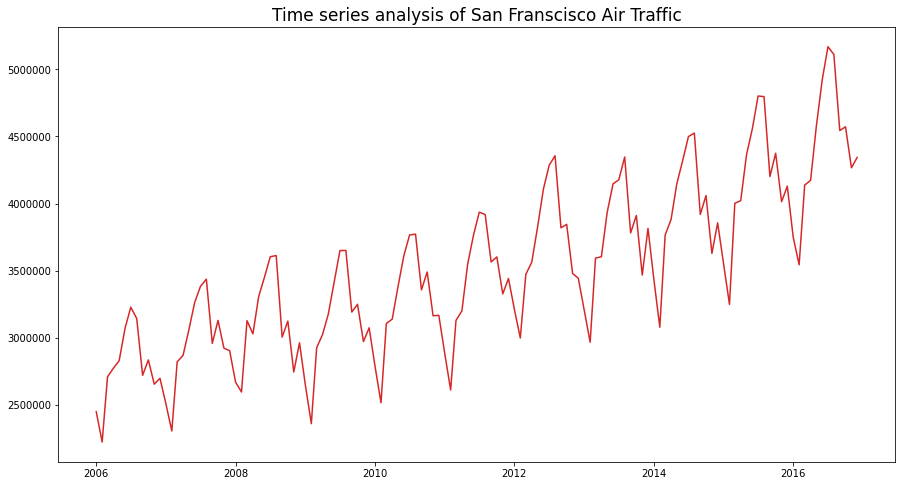

In [18]:
plt.figure(figsize= (15,8))

plt.plot(air_traffic_data.index, air_traffic_data['Total Passenger Count'], color='tab:red')
plt.title("Time series analysis of San Franscisco Air Traffic",fontsize = 17)
plt.ticklabel_format(style='plain', axis='y')

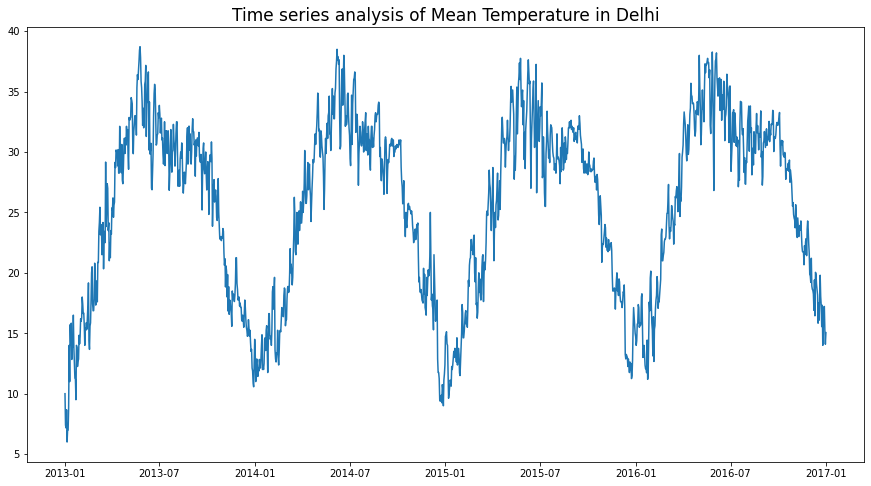

In [19]:
plt.figure(figsize= (15,8))

plt.plot(weather_data.index, weather_data['meantemp'], color='tab:blue')
plt.title("Time series analysis of Mean Temperature in Delhi",fontsize = 17)
plt.ticklabel_format(style='plain', axis='y')

#### Decompose Timeseries using Multiplicative model

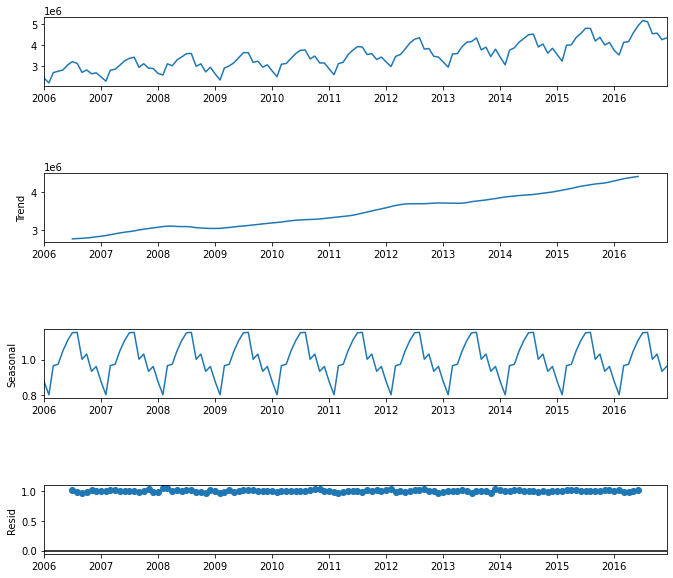

In [20]:
decomposition_multi = seasonal_decompose(air_traffic_data,
                                              model='multiplicative', period = 12)

fig = decomposition_multi.plot()
fig.set_size_inches((10, 9))
plt.show()

#### Decompose Timeseries using Additive model

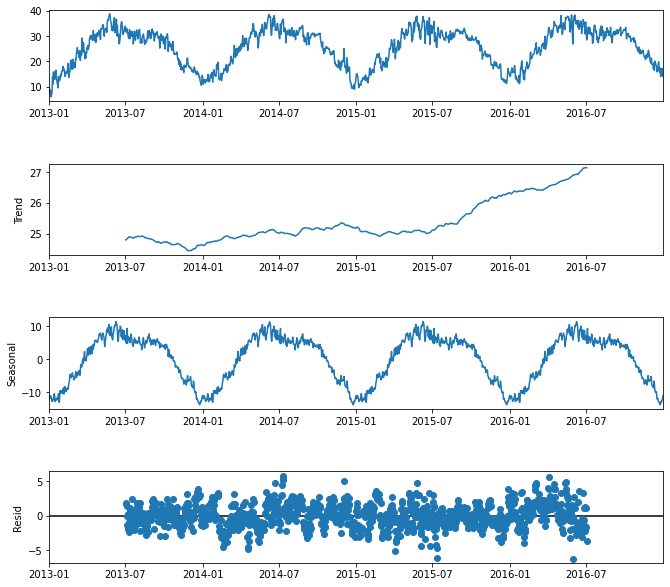

In [21]:
decomposition_add = seasonal_decompose(weather_data,
                                              model='additive',period = 365)

fig = decomposition_add.plot()
fig.set_size_inches((10, 9))
plt.show()